In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from scikeras.wrappers import KerasClassifier, KerasRegressor


In [2]:
#!pip install pydot

In [3]:
#!pip install tensorflow

In [4]:
#!pip install keras

In [5]:
#!pip install keras

In [6]:
#!pip install scikeras

In [7]:
orig=mnist

In [2]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [3]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
X_test_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
X_train_digit[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

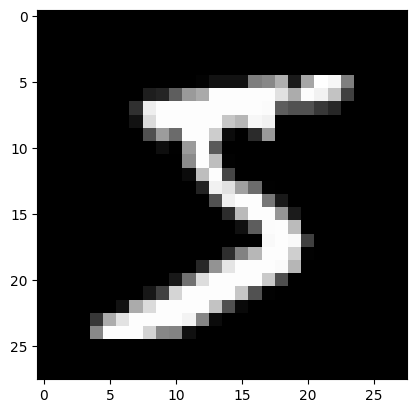

In [6]:
plt.imshow(X_train_digit[0], cmap='gray')

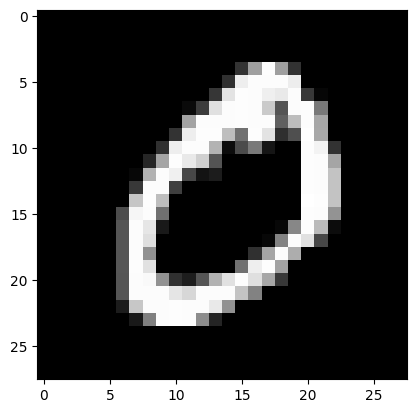

In [7]:
plt.imshow(X_train_digit[1], cmap='gray')

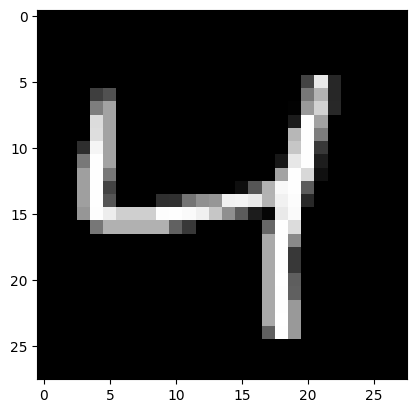

In [8]:
plt.imshow(X_train_digit[2], cmap='gray')

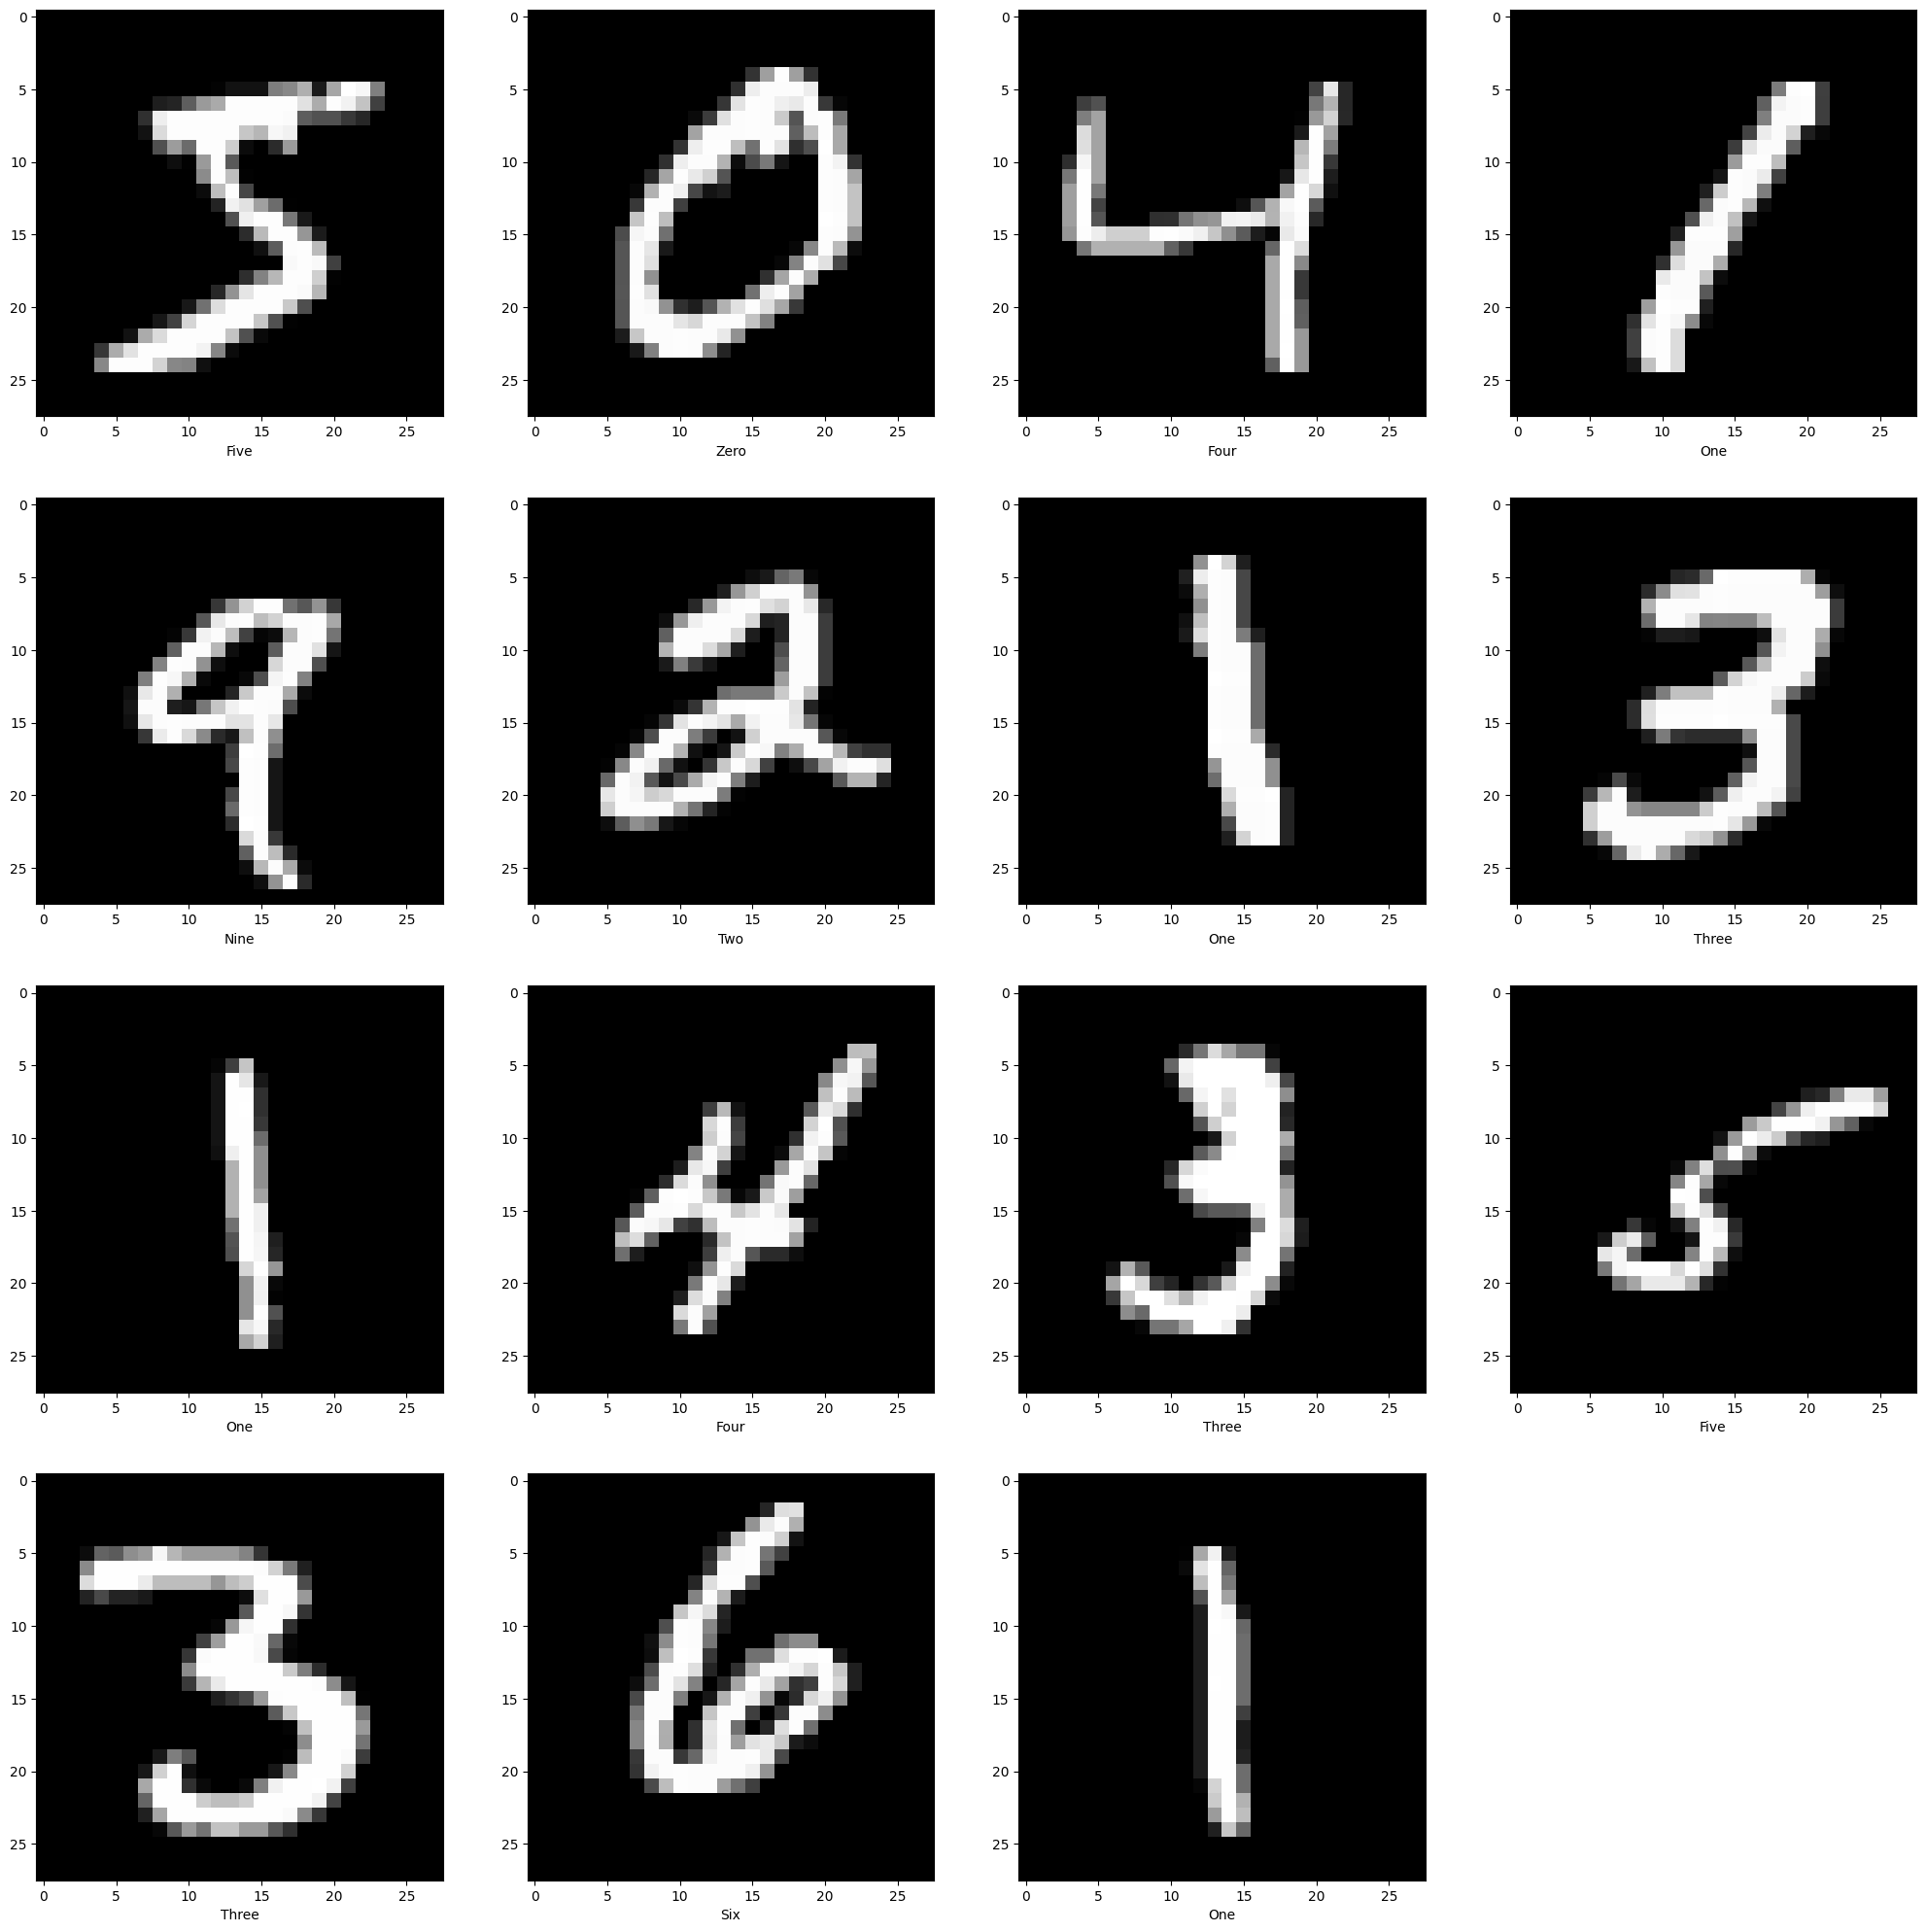

In [9]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
#col_names = ['Seven','Eight','Two','Three','Four','Five','Six','Zero','One','Nine']

#Visualizing the digits
plt.figure(figsize=(25,25))
for i in range(15):
    plt.subplot(4,4,i+1)
    #plt.xticks([])
    #plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

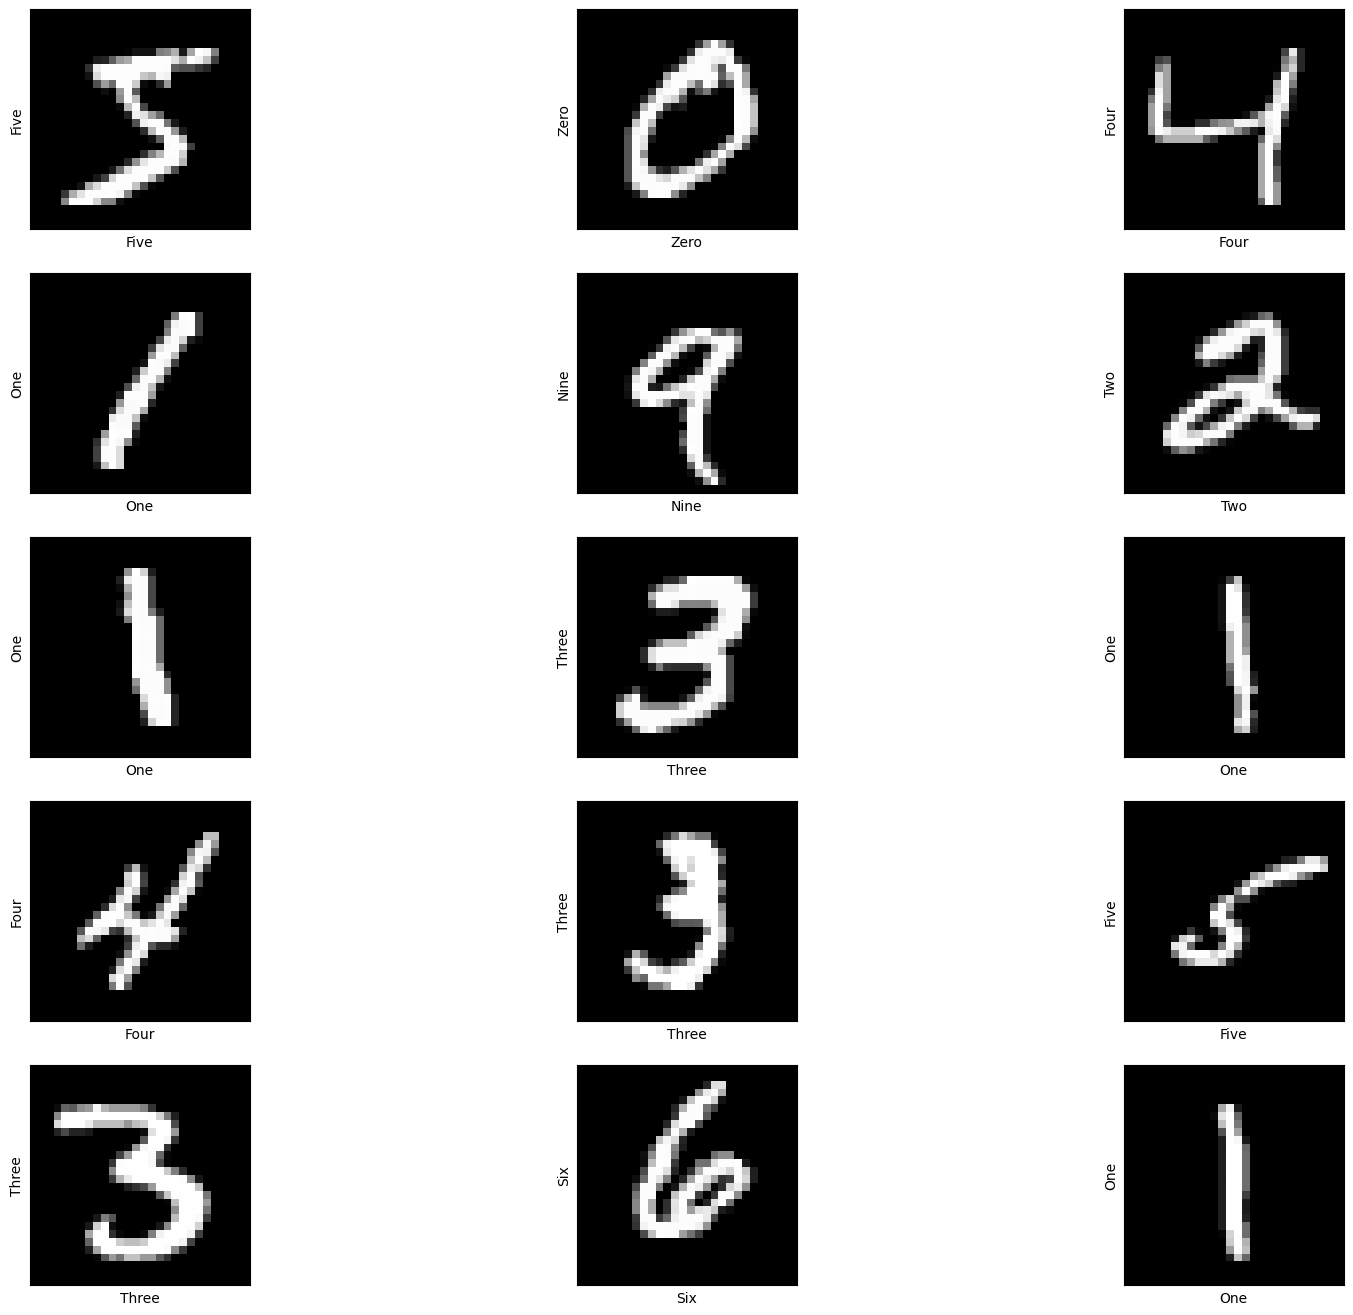

In [10]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
#col_names = ['Seven','Eight','Two','Three','Four','Five','Six','Zero','One','Nine']

#Visualizing the digits
plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(6,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
    plt.ylabel(col_names[y_train_digit[i]])
  
plt.show()

In [11]:
X_train_digit.shape

(60000, 28, 28)

# Preprocessing Data- Converting 3D to 2D

In [12]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [13]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
#Encoding Digit MNIST Labels
#to_categorical takes an array of integers (e.g., y_train_digit which has labels from 0 to 9) and converts 
#each integer into a binary vector with length equal to the number of classes (num_classes=10).
#For example, if a label is 3, it would be represented as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], where 1 is at the index of the label and the rest are 0s.
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [24]:
y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
y_train_digit[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Model, compile and fit method to predict the output

In [17]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

#layers.Dense(256, activation='relu', input_shape=(784,)):
#This is the first hidden layer with 256 neurons, using the ReLU activation function.
#input_shape=(784,) specifies the input size for this layer. For MNIST images (28x28 pixels), which are flattened into 784 features, 
#this is required only for the first layer.
#layers.Dense(64, activation='relu') (Second Hidden Layer):
#A second dense layer with 64 neurons and ReLU activation. This helps capture complex patterns by applying additional transformations to the input data.
#layers.Dense(64, activation='relu') (Third Hidden Layer):
#Another hidden layer identical to the previous one, adding further non-linear transformations.
#layers.Dense(10, activation='sigmoid') (Output Layer):
#The output layer with 10 neurons, where each neuron corresponds to a class. Since MNIST has 10 classes (digits 0–9), this layer size matches that.

C:\Users\Prabhu\anaconda3\envs\VEAI\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary() 
# paramnumber=output_channel_number*(input_channel_number+1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

#Loss: categorical_crossentropy measures the error in predictions for multi-class classification with one-hot encoded labels.
#Optimizer: adam adapts the learning rate based on training progress, making it robust for various types of models.
#Metrics: accuracy evaluates the proportion of correctly predicted samples.

In [20]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

#batch_size=100:

#Specifies the number of samples per gradient update.
#In this case, the model will process 100 samples at a time before updating the model weights.
#A larger batch size may train faster but may require more memory, while a smaller batch size may be more accurate but slower.
#epochs=10:

#The number of complete passes through the entire training dataset.
#Here, the model will go through the entire X_train_digit dataset 10 times during training.
#validation_data=(X_test_digit, y_test_digit):

#This specifies the validation dataset, which is used to evaluate the model performance at the end of each epoch.
#X_test_digit and y_test_digit are the features and labels for the test/validation dataset.
#It helps in monitoring the model's performance on unseen data during training, to detect overfitting or underfitting.
#Output (history)
#The fit() method returns a History object, which contains details about the training process.
#The History object has a dictionary attribute called history that stores training metrics like:
#loss: The training loss after each epoch.
#val_loss: The validation loss after each epoch.
#accuracy (if specified): The training accuracy after each epoch.
#val_accuracy (if specified): The validation accuracy after each epoch.

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7100 - loss: 3.3289 - val_accuracy: 0.9078 - val_loss: 0.3732
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9220 - loss: 0.2975 - val_accuracy: 0.9403 - val_loss: 0.2336
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9439 - loss: 0.2074 - val_accuracy: 0.9443 - val_loss: 0.2153
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9540 - loss: 0.1673 - val_accuracy: 0.9523 - val_loss: 0.1922
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9637 - loss: 0.1353 - val_accuracy: 0.9490 - val_loss: 0.2105
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9689 - loss: 0.1138 - val_accuracy: 0.9622 - val_loss: 0.1638
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9731 - loss: 0.0993 - val_accuracy: 0.9623 - val_loss: 0.1512
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9760 - loss: 0.0932 - val_accuracy: 0.

In [50]:
print(history.history)

{'accuracy': [0.8168333172798157, 0.9255666732788086, 0.9451333284378052, 0.9537666440010071, 0.9627666473388672, 0.9683166742324829, 0.970633327960968, 0.9735166430473328, 0.9767000079154968, 0.9771833419799805], 'loss': [1.1505955457687378, 0.2833627164363861, 0.2055247277021408, 0.17195233702659607, 0.1403973251581192, 0.11669649183750153, 0.1099967360496521, 0.0996241644024849, 0.0863378494977951, 0.08480057120323181], 'val_accuracy': [0.907800018787384, 0.9402999877929688, 0.9442999958992004, 0.9523000121116638, 0.9490000009536743, 0.9621999859809875, 0.9623000025749207, 0.9609000086784363, 0.9650999903678894, 0.9617000222206116], 'val_loss': [0.37316903471946716, 0.23357394337654114, 0.2153308391571045, 0.19218264520168304, 0.21047571301460266, 0.1637902706861496, 0.15117831528186798, 0.157321035861969, 0.1434115171432495, 0.16924555599689484]}


In [56]:
print("Training Accuracy:\n", history.history['accuracy'])
print("Training Loss: \n", history.history['loss'])
print("Validation Accuracy: \n", history.history['val_accuracy'])
print("Validation Loss:\n", history.history['val_loss'])



Training Accuracy:
 [0.8168333172798157, 0.9255666732788086, 0.9451333284378052, 0.9537666440010071, 0.9627666473388672, 0.9683166742324829, 0.970633327960968, 0.9735166430473328, 0.9767000079154968, 0.9771833419799805]
Training Loss: 
 [1.1505955457687378, 0.2833627164363861, 0.2055247277021408, 0.17195233702659607, 0.1403973251581192, 0.11669649183750153, 0.1099967360496521, 0.0996241644024849, 0.0863378494977951, 0.08480057120323181]
Validation Accuracy: 
 [0.907800018787384, 0.9402999877929688, 0.9442999958992004, 0.9523000121116638, 0.9490000009536743, 0.9621999859809875, 0.9623000025749207, 0.9609000086784363, 0.9650999903678894, 0.9617000222206116]
Validation Loss:
 [0.37316903471946716, 0.23357394337654114, 0.2153308391571045, 0.19218264520168304, 0.21047571301460266, 0.1637902706861496, 0.15117831528186798, 0.157321035861969, 0.1434115171432495, 0.16924555599689484]


In [46]:
# Ensure correct assignment
'''y_train_digit = y_train_digit.reshape(-1, 10)  # Should be (60000, 10)
y_test_digit = y_test_digit.reshape(-1, 10)    # Should be (10000, 10)

# Check the shapes
print(X_train_digit.shape)   # Expected: (60000, 784)
print(y_train_digit.shape)   # Expected: (60000, 10)
print('__________________________')
print(X_test_digit.shape)    # Expected: (10000, 784)
print(y_test_digit.shape)    # Expected: (10000, 10)'''


(60000, 784)
(10000, 10)
__________________________
(10000, 784)
(10000, 10)


In [47]:
# Optionally reduce dataset size for testing
'''num_samples = 10000
X_train_digit = X_train_digit[:num_samples]
y_train_digit = y_train_digit[:num_samples]

print(X_train_digit.shape)   # Now (10000, 784)
print(y_train_digit.shape)   # Now (10000, 10)'''


(10000, 784)
(10000, 10)


In [57]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)
#used to evaluate the performance of a trained neural network model on a test dataset:
print(f"Test Accuracy: {test_acc_digit:.4f}")
print(f"Test Loss: {test_loss_digit:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9546 - loss: 0.2054
Test Accuracy: 0.9617
Test Loss: 0.1692


In [22]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9617


In [23]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [24]:
y_predict

array([[2.1817673e-03, 1.0171204e-02, 9.9832183e-01, ..., 9.9999994e-01,
        5.7999748e-01, 9.8294002e-01],
       [4.8405161e-01, 9.9974978e-01, 1.0000000e+00, ..., 5.5563736e-01,
        6.5349376e-01, 6.7204614e-06],
       [1.9227969e-06, 1.0000000e+00, 3.1479436e-01, ..., 9.9705589e-01,
        9.9956995e-01, 9.7523737e-01],
       ...,
       [8.2853764e-02, 5.3283143e-01, 9.5405614e-01, ..., 9.9713638e-02,
        9.9999064e-01, 9.9996692e-01],
       [9.9999100e-01, 3.9130987e-09, 9.8827940e-01, ..., 2.7590469e-01,
        9.9998999e-01, 5.2170453e-06],
       [9.9997413e-01, 7.7967501e-01, 9.2628294e-01, ..., 8.6888811e-03,
        9.9061584e-01, 2.1193584e-06]], dtype=float32)

# Predicted Labels VS True Lables evaluvation

In [25]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)
#y_predicts contains the predicted class labels for the test dataset.
#y_test_digit_eval contains the true class labels for the test dataset.
#Both are in integer form (e.g., 0, 1, 2, ..., 9 for a 10-class problem).

In [26]:
print(y_predicts)

[7 2 1 ... 4 5 6]


In [44]:
print(y_predicts[0])

7


In [27]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6])

In [45]:
print(y_test_digit_eval[0])

7


In [28]:
y_pre=pd.DataFrame(y_predicts)

In [29]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [30]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6])

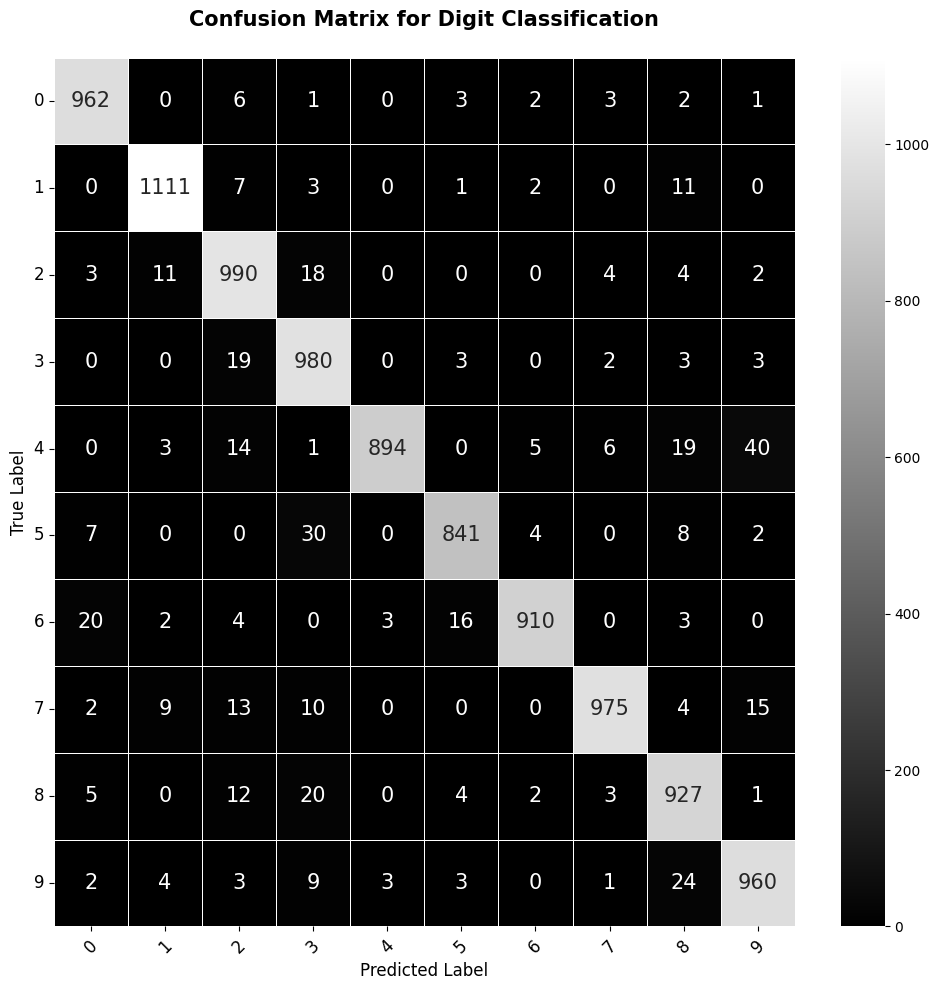

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
con_mat = confusion_matrix(y_test_digit_eval, y_predicts)

# Set style (optional)
plt.style.use('default')

# Create the heatmap with improved visual aesthetics
plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray", cbar=True)

# Improve readability of labels
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels
plt.yticks(fontsize=12, rotation=0)   # Rotate y-axis labels

# Add title and axis labels
plt.title('Confusion Matrix for Digit Classification\n', fontweight='bold', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Ensure that labels fit well
plt.tight_layout()

# Show the plot
plt.show()


In [67]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.96      0.94      1032
           3       0.91      0.97      0.94      1010
           4       0.99      0.91      0.95       982
           5       0.97      0.94      0.95       892
           6       0.98      0.95      0.97       958
           7       0.98      0.95      0.96      1028
           8       0.92      0.95      0.94       974
           9       0.94      0.95      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.96      0.95      0.95     10000
weighted avg       0.96      0.95      0.96     10000



In [34]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


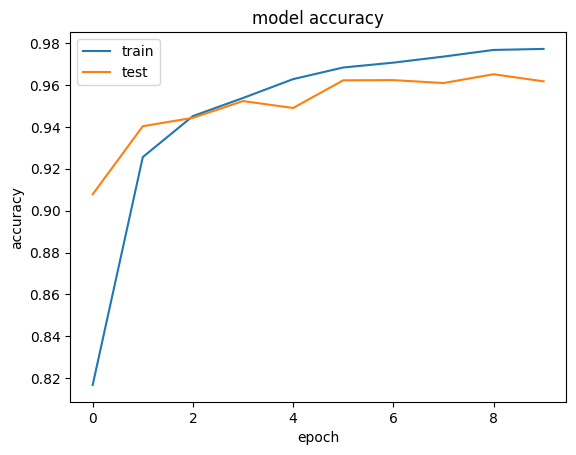

In [35]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

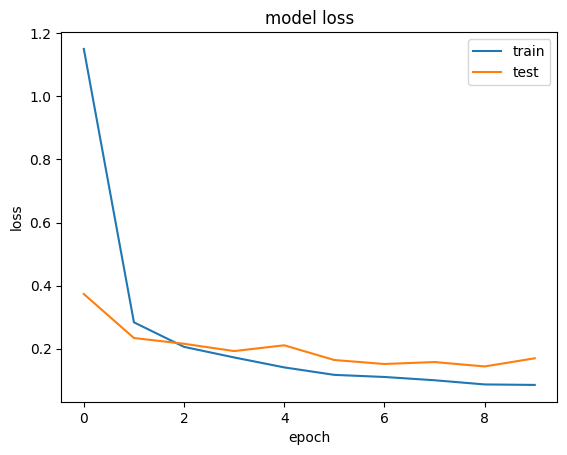

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [68]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[6]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [69]:
print(y_predicts_single[0])

4


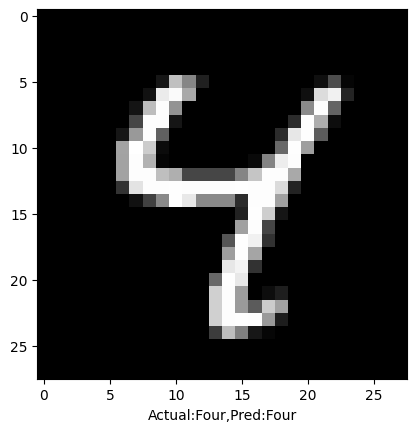

In [70]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[6].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[6])],col_names[y_predicts_single[0]]))
plt.show()

In [71]:
y_test_digit[6]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])